First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
--

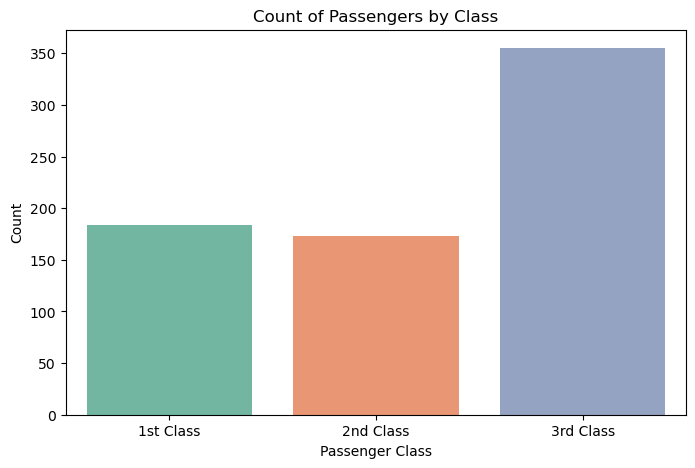

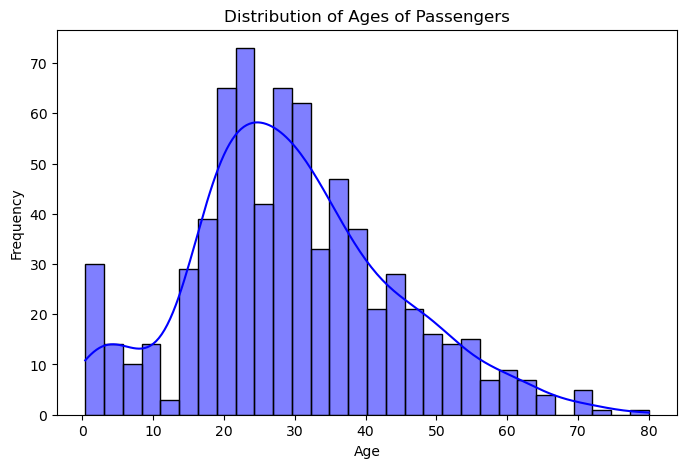

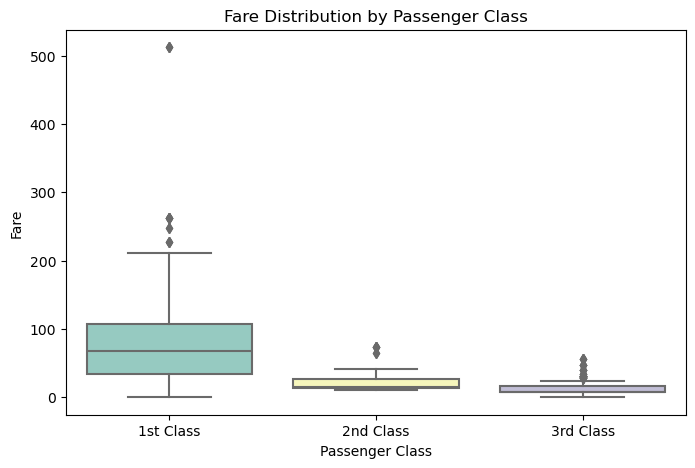

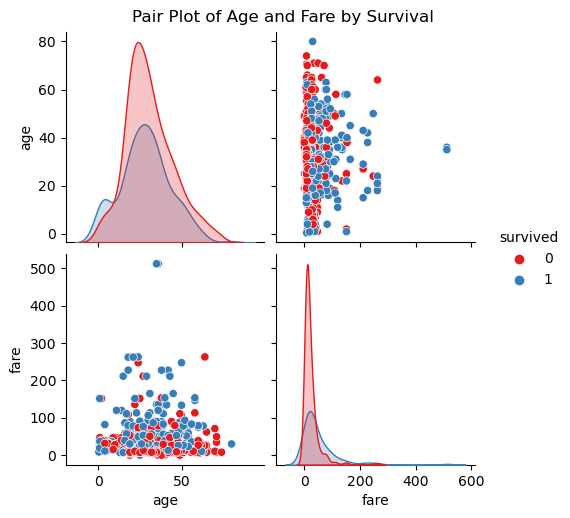

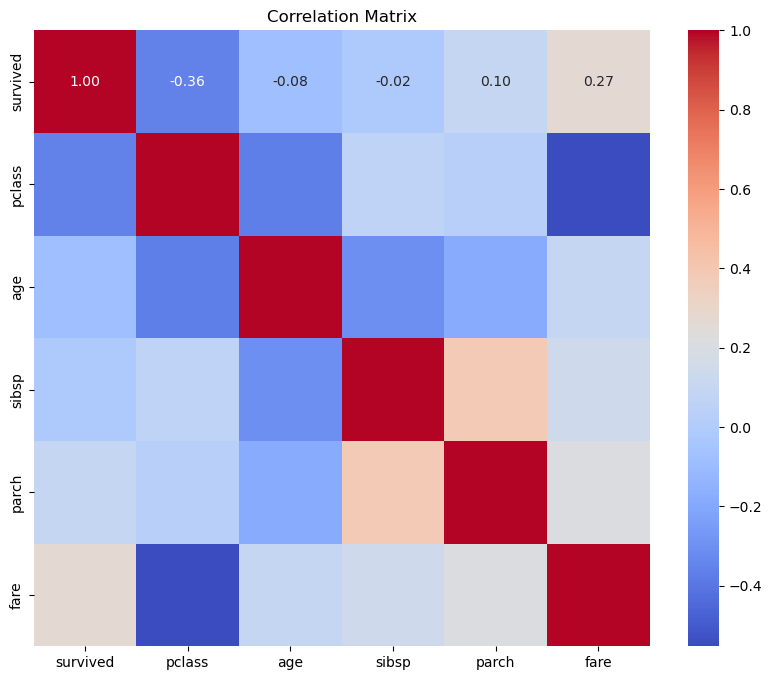

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values or drop rows
df.dropna(subset=['age', 'embarked'], inplace=True)  # Dropping rows with missing age and embarked

# Visualizations

# 1. Count plot for passenger class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='pclass', palette='Set2')
plt.title('Count of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

# 2. Histogram of ages
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ages of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Box plot of fares by passenger class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='pclass', y='fare', palette='Set3')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

# 4. Pair plot for selected numerical features
sns.pairplot(df, vars=['age', 'fare'], hue='survived', palette='Set1')
plt.suptitle('Pair Plot of Age and Fare by Survival', y=1.02)
plt.show()

# 5. Heatmap of the correlation matrix
# Select only numeric columns for correlation
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()
